# Book3 (of 4) - Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time  
import ast
import pytz

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\clean.csv")

In [3]:
data.head()

,request_make,request_creative_type,event_campaign_id,bundle_publisher_bundle_category,bundle_publisher_bundle_sub_category,bundle_ctr_30d,user_impression_depth_offer_d90,user_click_depth_offer_d90,user_impression_depth_campaign_d90,user_click_depth_campaign_d90,user_is_clicker,user_primary_category_d90,premium_inventory,target
0,Unknown,Banner,12636,3,NaN,0.000115,5.0,0.0,5.0,0.0,0,3.0,1,0
1,Samsung,Banner,11080,33,NaN,0.000278,36.0,0.0,6.0,0.0,0,3.0,0,0
2,Apple,Banner,13168,84,NaN,0.005781,1.0,0.0,1.0,0.0,0,84.0,0,0
3,Samsung,Banner,11080,29,NaN,0.000020,10.0,0.0,6.0,0.0,0,29.0,0,0
4,Apple,Banner,13357,77,NaN,0.000030,NaN,NaN,NaN,NaN,0,NaN,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   request_make                          9804 non-null   object 
 1   request_creative_type                 9804 non-null   object 
 2   event_campaign_id                     9804 non-null   int64  
 3   bundle_publisher_bundle_category      9804 non-null   int64  
 4   bundle_publisher_bundle_sub_category  5017 non-null   float64
 5   bundle_ctr_30d                        9683 non-null   float64
 6   user_impression_depth_offer_d90       7422 non-null   float64
 7   user_click_depth_offer_d90            7422 non-null   float64
 8   user_impression_depth_campaign_d90    7422 non-null   float64
 9   user_click_depth_campaign_d90         7422 non-null   float64
 10  user_is_clicker                       9804 non-null   int64  
 11  user_primary_cate

In [5]:
# Let us convert Object to Category types
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')

The following colums are actually categorical (the categoreis just happend to have numeric IDs):
'event_campaign_id', 'bundle_publisher_bundle_category', 'bundle_publisher_bundle_sub_category', 'user_primary_category_d90'
Let us convert them to category type

In [6]:
# Columns to convert to 'category' type
columns_to_convert = [
    'event_campaign_id',
    'bundle_publisher_bundle_category',
    'bundle_publisher_bundle_sub_category',
    'user_primary_category_d90'
]

# Convert specified columns to 'category' type
for column in columns_to_convert:
    data[column] = data[column].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   request_make                          9804 non-null   category
 1   request_creative_type                 9804 non-null   category
 2   event_campaign_id                     9804 non-null   category
 3   bundle_publisher_bundle_category      9804 non-null   category
 4   bundle_publisher_bundle_sub_category  5017 non-null   category
 5   bundle_ctr_30d                        9683 non-null   float64 
 6   user_impression_depth_offer_d90       7422 non-null   float64 
 7   user_click_depth_offer_d90            7422 non-null   float64 
 8   user_impression_depth_campaign_d90    7422 non-null   float64 
 9   user_click_depth_campaign_d90         7422 non-null   float64 
 10  user_is_clicker                       9804 non-null   int64   
 11  user

In [8]:
# Functil to print top unique value count, top 10 values and data type
def examine_values(df):
    for column in df.columns:
        unique_count = df[column].nunique()
        print(f"\033[1m{column}\033[0m (Unique Count: {unique_count})")  
        print(df[column].value_counts().head(10))
        print()

In [9]:
# Let us run our beautiful function
examine_values(data)

request_make (Unique Count: 49)
Apple       3119
Samsung     2696
Unknown     1553
Motorola     953
Xiaomi       373
LG           151
Huawei       146
OnePlus      136
Google       101
T-Mobile      84
Name: request_make, dtype: int64

request_creative_type (Unique Count: 4)
Banner          4634
Interstitial    2497
Video           1740
Native           933
Name: request_creative_type, dtype: int64

event_campaign_id (Unique Count: 76)
11080    1408
12641     972
12800     729
12205     404
13367     398
13352     382
13374     354
12637     349
13120     347
13357     326
Name: event_campaign_id, dtype: int64

bundle_publisher_bundle_category (Unique Count: 38)
2     3037
3     1929
86    1900
29     659
83     464
77     221
14     197
32     111
16     109
21     102
Name: bundle_publisher_bundle_category, dtype: int64

bundle_publisher_bundle_sub_category (Unique Count: 33)
38.0     817
101.0    604
4.0      572
108.0    443
100.0    443
42.0     307
102.0    249
34.0     232
46.0 

In [10]:
# Counting NaN values in each column
nan_count = data.isna().sum()
print(nan_count)

request_make                               0
request_creative_type                      0
event_campaign_id                          0
bundle_publisher_bundle_category           0
bundle_publisher_bundle_sub_category    4787
bundle_ctr_30d                           121
user_impression_depth_offer_d90         2382
user_click_depth_offer_d90              2382
user_impression_depth_campaign_d90      2382
user_click_depth_campaign_d90           2382
user_is_clicker                            0
user_primary_category_d90               2382
premium_inventory                          0
target                                     0
dtype: int64


## Treating the NaNs

In [11]:
# Fill NaNs in numerical columns with the median and in categorical columns with the mode
for column in data.columns:
    if data[column].dtype.name == 'category':
        # Calculate the mode and use the first mode if there are multiple modes
        mode = data[column].mode().iloc[0]
        data[column] = data[column].fillna(mode)
    elif pd.api.types.is_numeric_dtype(data[column]):
        median = data[column].median()
        data[column] = data[column].fillna(median)


In [12]:
# Counting NaN values in each column
nan_count = data.isna().sum()
print(nan_count)

request_make                            0
request_creative_type                   0
event_campaign_id                       0
bundle_publisher_bundle_category        0
bundle_publisher_bundle_sub_category    0
bundle_ctr_30d                          0
user_impression_depth_offer_d90         0
user_click_depth_offer_d90              0
user_impression_depth_campaign_d90      0
user_click_depth_campaign_d90           0
user_is_clicker                         0
user_primary_category_d90               0
premium_inventory                       0
target                                  0
dtype: int64


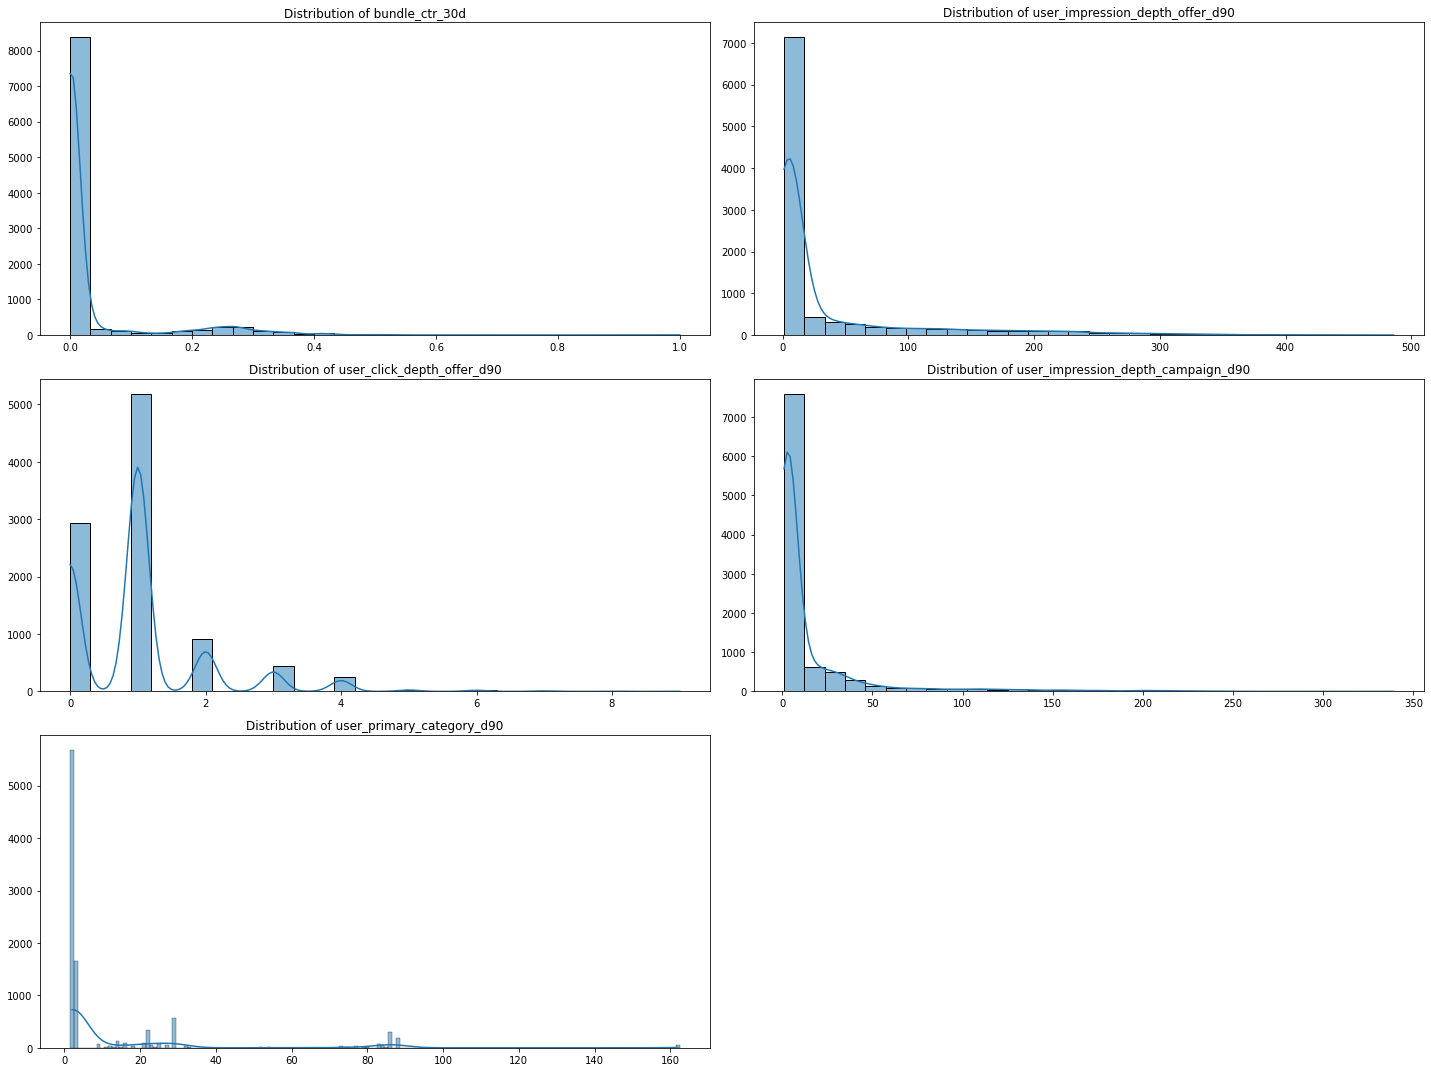

In [13]:
# Let us look at the distributions of the numerical columns
# I am excluding the binary 0/1 columns

selected_columns = ['bundle_ctr_30d', 'user_impression_depth_offer_d90','user_click_depth_offer_d90',
                    'user_impression_depth_campaign_d90','user_primary_category_d90']

# Number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(selected_columns) + n_cols - 1) // n_cols

# Increase the width here (for example, from 5 to 10 for each subplot)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the distribution of each numerical column
for i, col in enumerate(selected_columns):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any empty subplots
for i in range(len(selected_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Observation:
- The first five numerical columns are right-skewed and will need to be transformed:
   - bundle_ctr_30d 
   - user_impression_depth_offer_d90
   - user_click_depth_offer_d90
   - user_impression_depth_campaign_d90
   - user_click_depth_campaign_d90
- the last 3 are actually binary 0/1 columns. They do not need to be transformed. 

# Log Transformation Attempt

In [14]:
# Columns to transform and their new names
columns_to_transform = {
    'bundle_ctr_30d': 'bun_ctr_30d_log',
    'user_impression_depth_offer_d90': 'u_imp_depth_offer_d90_log',
    'user_click_depth_offer_d90': 'u_click_depth_offer_d90_log',
    'user_impression_depth_campaign_d90': 'u_imp_depth_camp_d90_log',
    'user_click_depth_campaign_d90': 'u_click_depth_camp_d90_log'
}

# Perform log transformation and create new columns
for old_col, new_col in columns_to_transform.items():
    data[new_col] = np.log(data[old_col] + 1)  # Adding 1 to avoid log(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   request_make                          9804 non-null   category
 1   request_creative_type                 9804 non-null   category
 2   event_campaign_id                     9804 non-null   category
 3   bundle_publisher_bundle_category      9804 non-null   category
 4   bundle_publisher_bundle_sub_category  9804 non-null   category
 5   bundle_ctr_30d                        9804 non-null   float64 
 6   user_impression_depth_offer_d90       9804 non-null   float64 
 7   user_click_depth_offer_d90            9804 non-null   float64 
 8   user_impression_depth_campaign_d90    9804 non-null   float64 
 9   user_click_depth_campaign_d90         9804 non-null   float64 
 10  user_is_clicker                       9804 non-null   int64   
 11  user

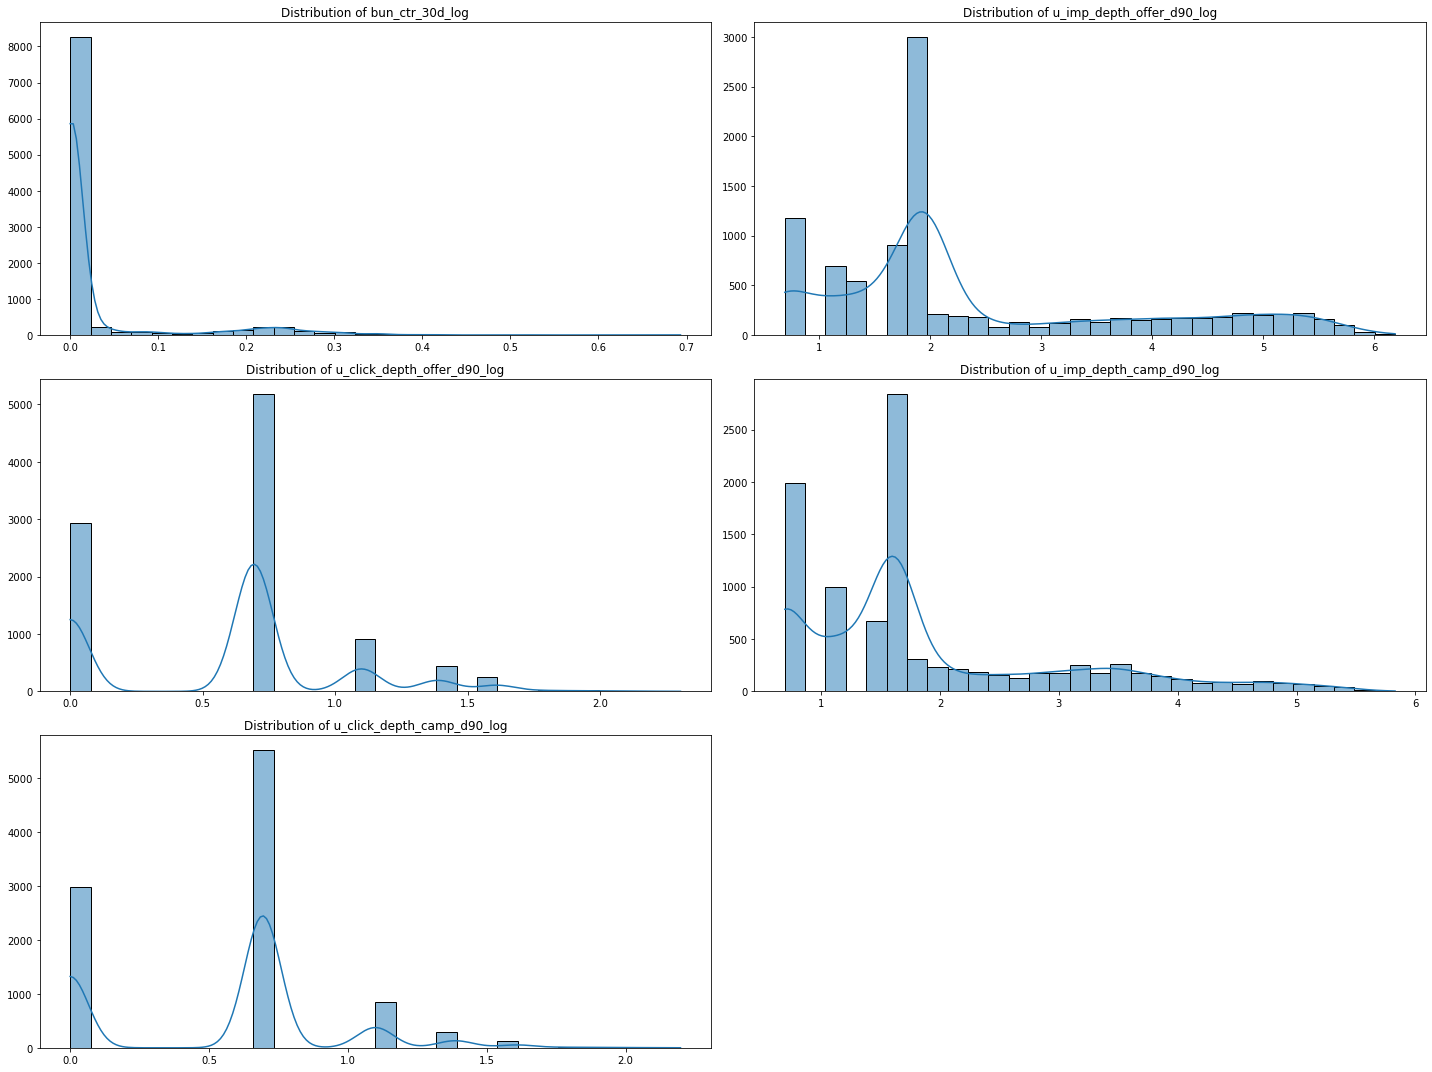

In [15]:
# Let us look at the distributions of the columns that we transformed

selected_columns = ['bun_ctr_30d_log', 'u_imp_depth_offer_d90_log','u_click_depth_offer_d90_log',
                    'u_imp_depth_camp_d90_log','u_click_depth_camp_d90_log']

# Number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(selected_columns) + n_cols - 1) // n_cols

# Increase the width here (for example, from 5 to 10 for each subplot)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the distribution of each numerical column
for i, col in enumerate(selected_columns):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any empty subplots
for i in range(len(selected_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Observation:** 
- The log transformation reduced the skew. However, the resulting distribution are still far from being normal.

# Quantile Transformation

Since log Transformation didn't do well let us attempt a Quantile Transforamtion (thanks for the tip, Savio!)

In [16]:
# Columns to transform and their new names
columns_to_transform = {
    'bundle_ctr_30d': 'bun_ctr_30d_quan',
    'user_impression_depth_offer_d90': 'u_imp_depth_offer_d90_quan',
    'user_click_depth_offer_d90': 'u_click_depth_offer_d90_quan',
    'user_impression_depth_campaign_d90': 'u_imp_depth_camp_d90_quan',
    'user_click_depth_campaign_d90': 'u_click_depth_camp_d90_quan'
}

# Create the QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal', random_state=0)

# Apply the transformation
for original_col, new_col in columns_to_transform.items():
    data[new_col] = transformer.fit_transform(data[[original_col]])

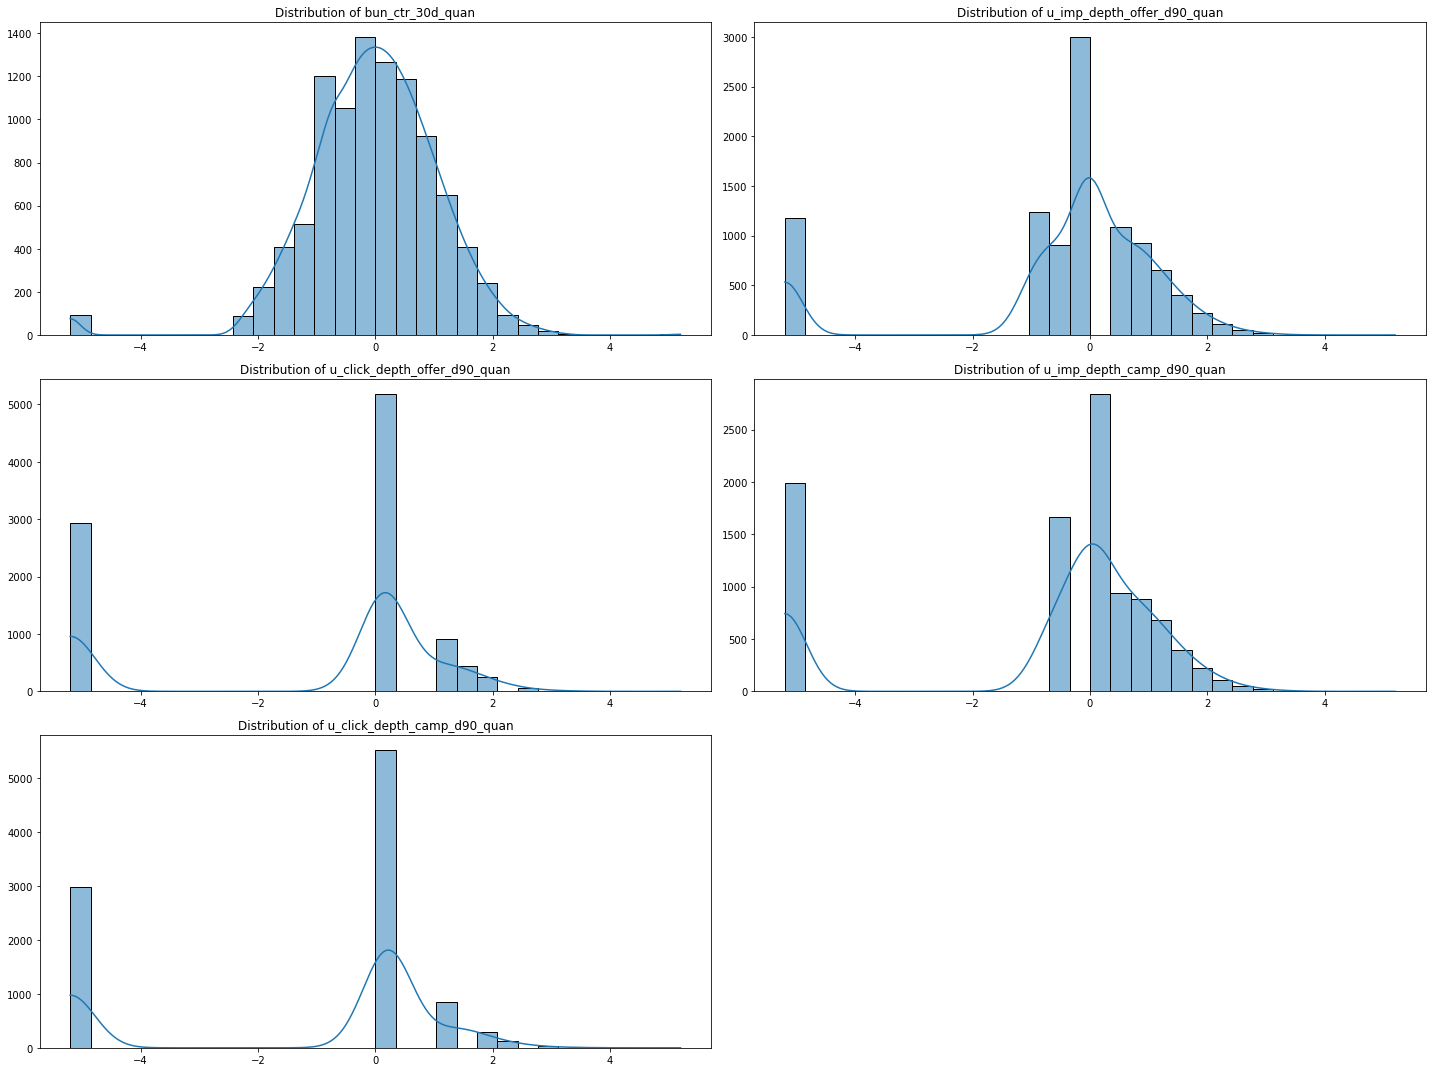

In [17]:
# Let us look at the distributions of the columns that we transformed with Quantile Transformer

selected_columns = ['bun_ctr_30d_quan', 'u_imp_depth_offer_d90_quan','u_click_depth_offer_d90_quan',
                    'u_imp_depth_camp_d90_quan','u_click_depth_camp_d90_quan']

# Number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(selected_columns) + n_cols - 1) // n_cols

# Increase the width here (for example, from 5 to 10 for each subplot)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the distribution of each numerical column
for i, col in enumerate(selected_columns):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any empty subplots
for i in range(len(selected_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Observation:**
- Quantile Transformation produced much better results than Log Transformation.
- Specifically, bun_ctr_30d looks like a beautiful Normal distribution.
- The other distributions are still not normal but look better than with the Log transformation. They were just too irregular to begin with. 

**Note**:
- I also considered Box-Cox transformation, but it requires that all of the values are >0. Some of the values are 0, so it will not apply.

**Conclusion:**
- Quantile Transformaiton is the best solution. Let us keep the Quantile columns and delete both the Log-transformed columns and the original columns.

In [18]:
columns_to_drop = [
    'bundle_ctr_30d', 'bun_ctr_30d_log',
    'user_impression_depth_offer_d90', 'u_imp_depth_offer_d90_log',
    'user_click_depth_offer_d90', 'u_click_depth_offer_d90_log',
    'user_impression_depth_campaign_d90', 'u_imp_depth_camp_d90_log',
    'user_click_depth_campaign_d90', 'u_click_depth_camp_d90_log'
]

data.drop(columns_to_drop, axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   request_make                          9804 non-null   category
 1   request_creative_type                 9804 non-null   category
 2   event_campaign_id                     9804 non-null   category
 3   bundle_publisher_bundle_category      9804 non-null   category
 4   bundle_publisher_bundle_sub_category  9804 non-null   category
 5   user_is_clicker                       9804 non-null   int64   
 6   user_primary_category_d90             9804 non-null   category
 7   premium_inventory                     9804 non-null   int64   
 8   target                                9804 non-null   int64   
 9   bun_ctr_30d_quan                      9804 non-null   float64 
 10  u_imp_depth_offer_d90_quan            9804 non-null   float64 
 11  u_cl

# Variance Inflation Factor (VIF)

Since we have treated the NaNs we can calculate VIF on the numerical columns

In [19]:
# A function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

In [20]:
# Let us calculate VIF for numerical columns
# Separating numerical variables
numerical_col = data.select_dtypes(include='number').columns.tolist()
numerical_data = data[numerical_col]
vif_result = calculate_vif(numerical_data)
print(vif_result)

                       Variable        VIF
0               user_is_clicker   1.680691
1             premium_inventory   3.441289
2                        target   4.834029
3              bun_ctr_30d_quan   1.687666
4    u_imp_depth_offer_d90_quan   3.457844
5  u_click_depth_offer_d90_quan  38.519080
6     u_imp_depth_camp_d90_quan   3.751559
7   u_click_depth_camp_d90_quan  38.920494


## Observation:
- Indeed, VIF is too high for two of the variables (u_click_depth_offer_d90_quan and u_click_depth_camp_d90_quan). 
- Since u_click_depth_offer_d90_log has a very high VIF while also lower association with the target than u_click_depth_camp_d90_log, let us drop it.

In [21]:
# Dropping the column 'u_click_depth_offer_d90_quan'
data.drop('u_click_depth_offer_d90_quan', axis=1, inplace=True)

In [22]:
# Let us calculate VIF for numerical columns again
# Separating numerical variables
numerical_col = data.select_dtypes(include='number').columns.tolist()
numerical_data = data[numerical_col]
vif_result = calculate_vif(numerical_data)
print(vif_result)

                      Variable       VIF
0              user_is_clicker  1.616256
1            premium_inventory  3.440887
2                       target  4.814884
3             bun_ctr_30d_quan  1.680951
4   u_imp_depth_offer_d90_quan  3.380487
5    u_imp_depth_camp_d90_quan  3.666786
6  u_click_depth_camp_d90_quan  1.218545


## Observation:
- VIF is now in a decent range (under 10)

# Checking for outliers

In [23]:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
def histogram_boxplot(feature, data=None, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    data: DataFrame containing the feature (default None)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,
                                           sharex=True,
                                           gridspec_kw={"height_ratios": (.25, .75)},
                                           figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='violet')
    if bins:
        sns.histplot(data=data, x=feature, kde=False, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=False, ax=ax_hist2, palette="winter")
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')
    
    # Set the chart title based on the feature name
    f2.suptitle(f'Histogram and Boxplot for {feature}', fontsize=16)

In [24]:
# Select only the numerical columns from the DataFrame
numerical_col = data.select_dtypes(include=['float64', 'int64']).columns

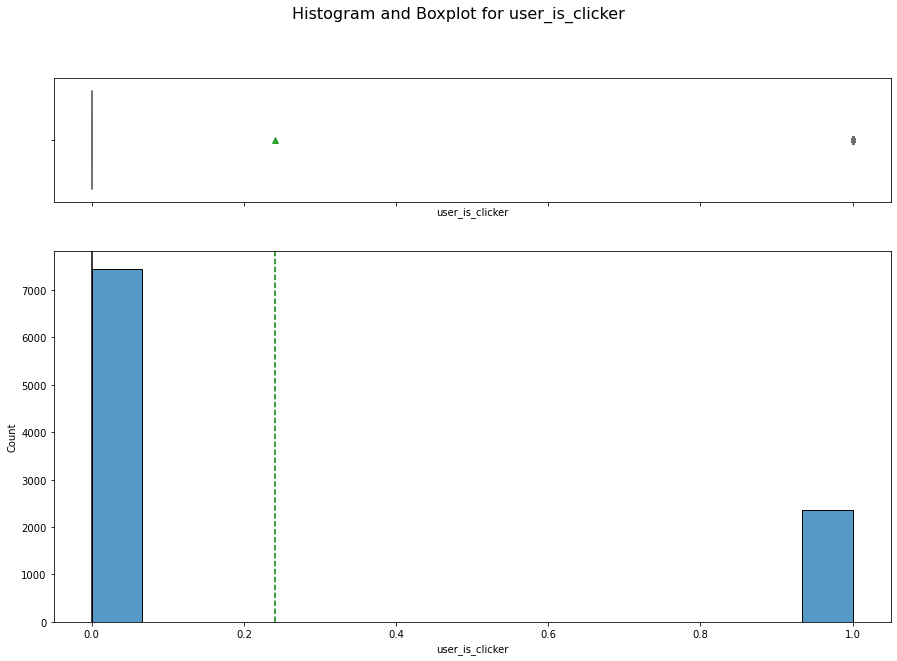

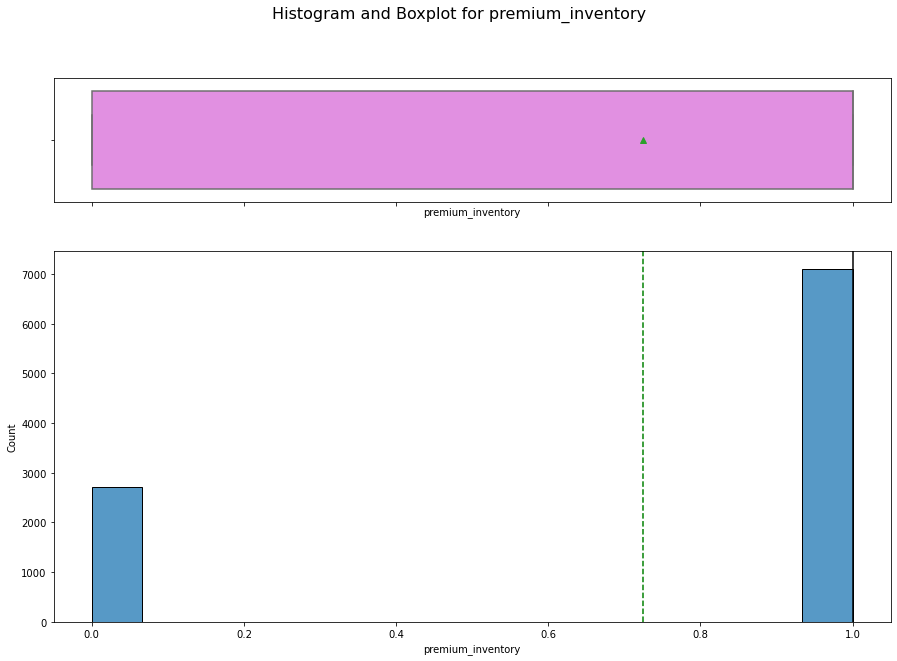

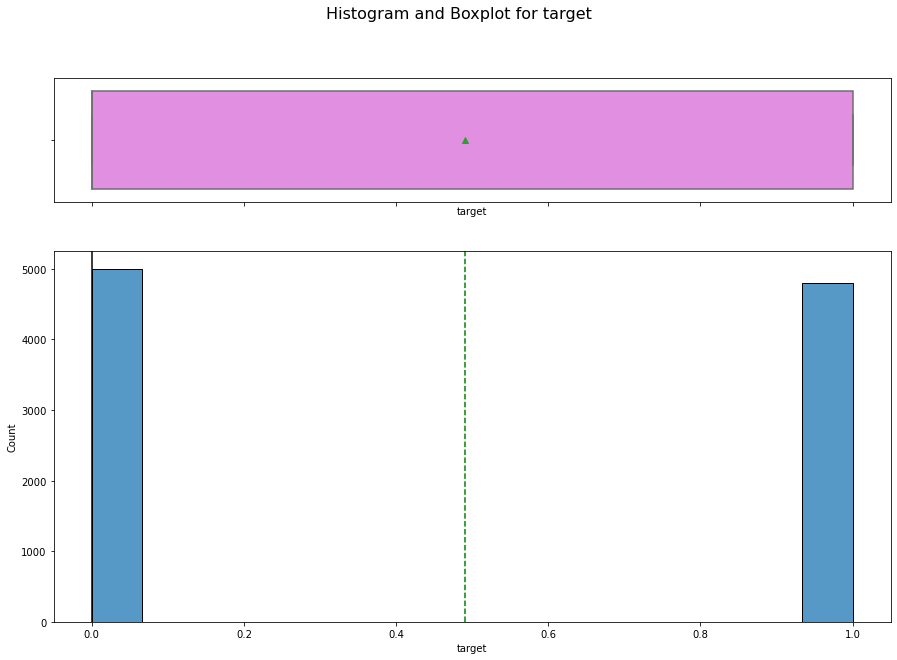

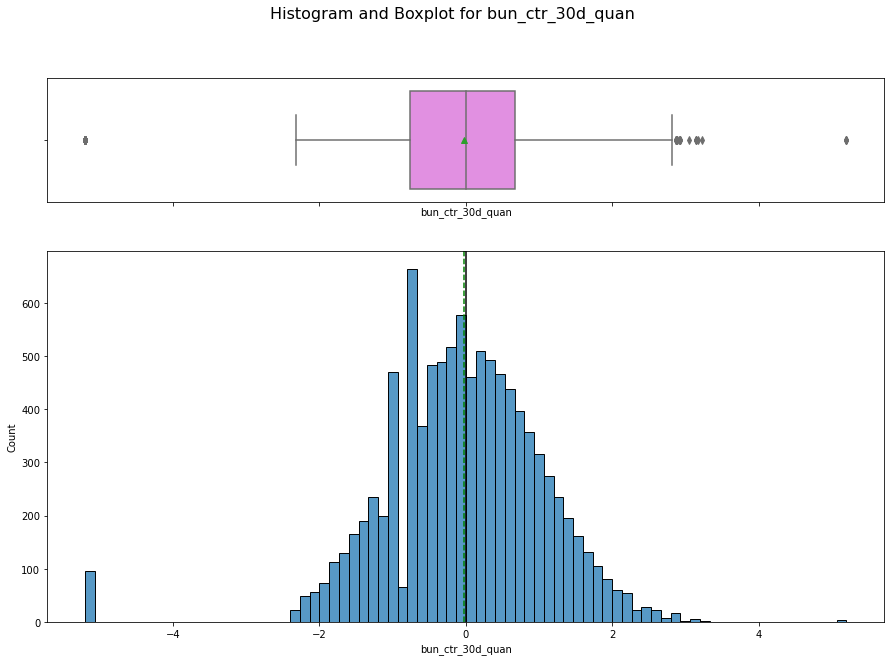

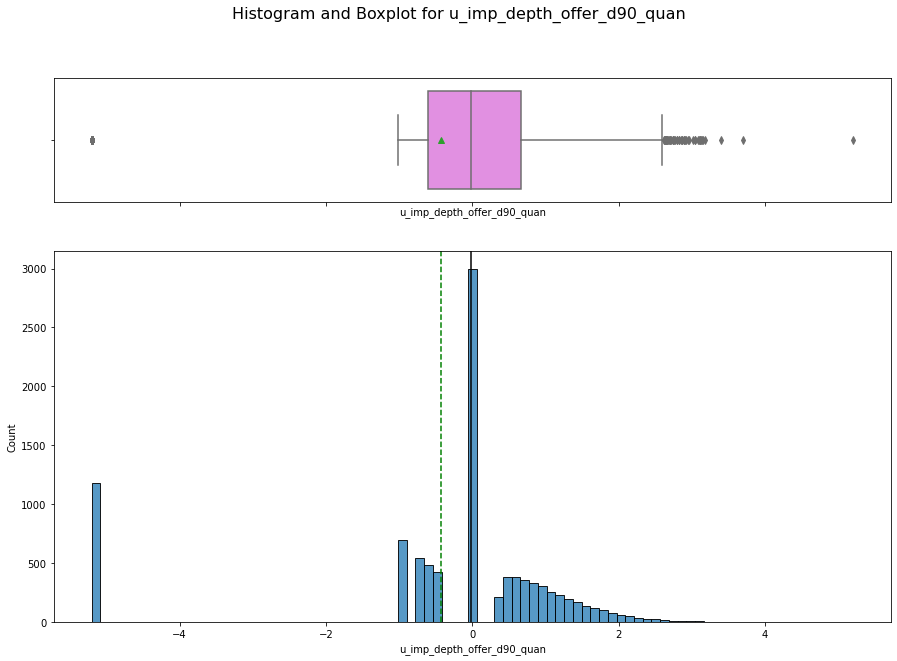

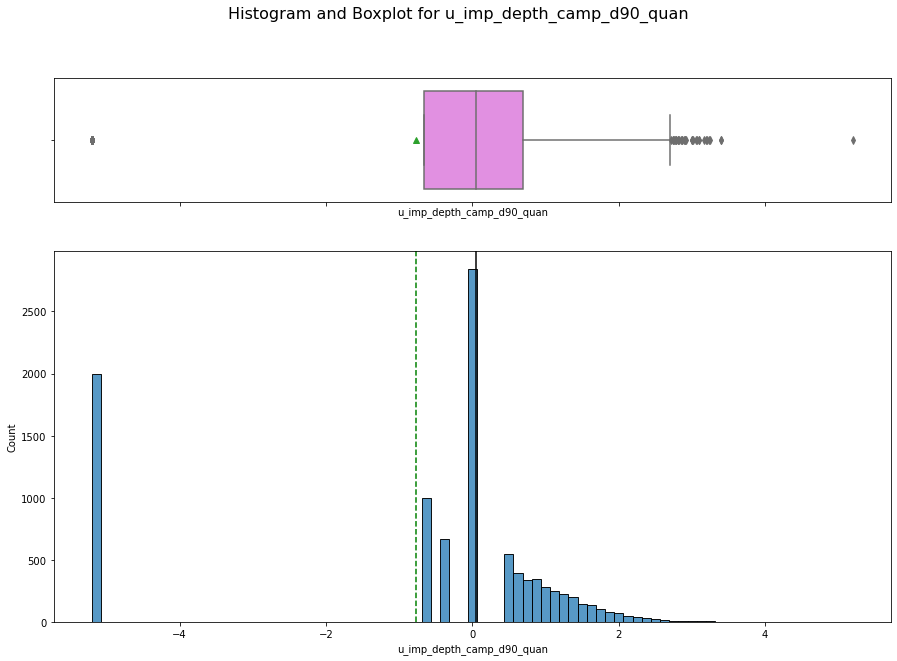

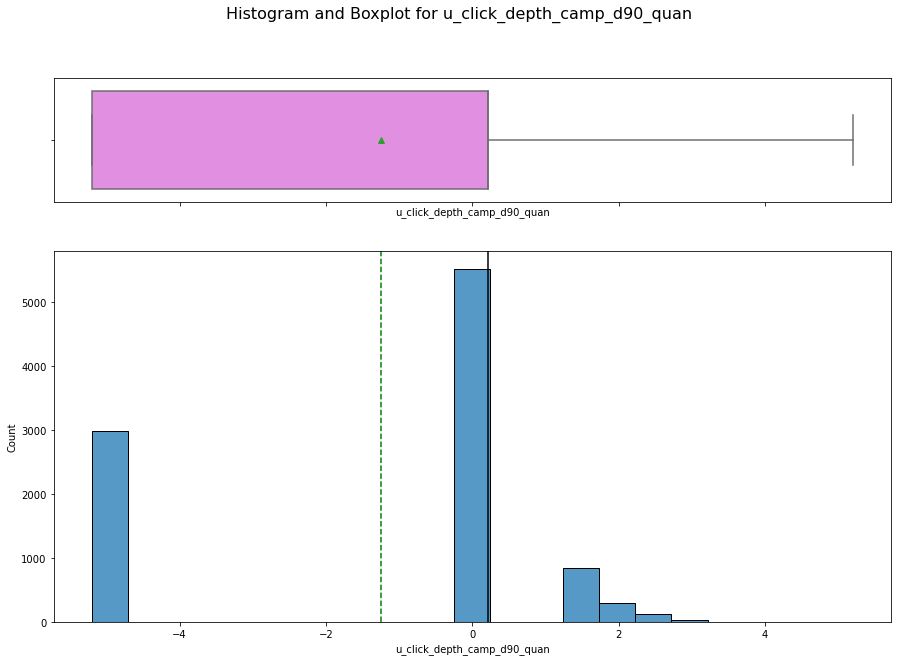

In [25]:
# Build the histogram boxplots for all numerical columns
for col in numerical_col:
    histogram_boxplot(col, data=data)

## Observation:
- Some variables still have outliners. However, I don’t want to treat them because these outliers are the 0 values. That is useful information. Also, many models I will try are not sensitive to outliers. Imputing outliers for such models would result in lost information.
- We should also scale one-hot encode the categorical variables.

# Scaling the numerical columns (except binary)

Note: some of the columns with type "Integer" are actually binary columns. We don't want to scale those. 

In [26]:
# Step 1: Identify Numerical Columns
numerical_cols = data.select_dtypes(include=[np.number])

# Step 2: Exclude Binary Columns
# A column is considered binary if its unique values are in the set {0, 1}
non_binary_numerical_cols = numerical_cols.columns[(numerical_cols.nunique() > 2) | (numerical_cols.max() > 1)]

# Step 3: Apply Standard Scaler
scaler = StandardScaler()
data[non_binary_numerical_cols] = scaler.fit_transform(data[non_binary_numerical_cols])

data.head()

,request_make,request_creative_type,event_campaign_id,bundle_publisher_bundle_category,bundle_publisher_bundle_sub_category,user_is_clicker,user_primary_category_d90,premium_inventory,target,bun_ctr_30d_quan,u_imp_depth_offer_d90_quan,u_imp_depth_camp_d90_quan,u_click_depth_camp_d90_quan
0,Unknown,Banner,12636,3,38.0,0,3.0,1,0,-0.354598,-0.025031,0.531117,-1.487503
1,Samsung,Banner,11080,33,38.0,0,3.0,0,0,-0.229665,0.617278,0.565332,-1.487503
2,Apple,Banner,13168,84,38.0,0,84.0,0,0,0.655191,-2.482584,-1.896532,-1.487503
3,Samsung,Banner,11080,29,38.0,0,29.0,0,0,-1.484742,0.484569,0.565332,-1.487503
4,Apple,Banner,13357,77,38.0,0,2.0,1,0,-1.327349,0.210790,0.351027,0.551172


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   request_make                          9804 non-null   category
 1   request_creative_type                 9804 non-null   category
 2   event_campaign_id                     9804 non-null   category
 3   bundle_publisher_bundle_category      9804 non-null   category
 4   bundle_publisher_bundle_sub_category  9804 non-null   category
 5   user_is_clicker                       9804 non-null   int64   
 6   user_primary_category_d90             9804 non-null   category
 7   premium_inventory                     9804 non-null   int64   
 8   target                                9804 non-null   int64   
 9   bun_ctr_30d_quan                      9804 non-null   float64 
 10  u_imp_depth_offer_d90_quan            9804 non-null   float64 
 11  u_im

# One-hot encoding of Categorical variables

Let us one-hot encode the categorical variables

In [28]:
# Select only categorical columns (assuming they are of type 'object' or 'category')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns


# Apply one-hot encoding to the categorical columns, dropping the first column
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data_encoded.sample(5)

,user_is_clicker,premium_inventory,target,bun_ctr_30d_quan,u_imp_depth_offer_d90_quan,u_imp_depth_camp_d90_quan,u_click_depth_camp_d90_quan,request_make_Alcatel,request_make_Apple,request_make_Asus,...,user_primary_category_d90_83.0,user_primary_category_d90_84.0,user_primary_category_d90_85.0,user_primary_category_d90_86.0,user_primary_category_d90_87.0,user_primary_category_d90_88.0,user_primary_category_d90_89.0,user_primary_category_d90_90.0,user_primary_category_d90_95.0,user_primary_category_d90_162.0
8407,0,1,1,0.867642,-2.482584,-1.896532,0.551172,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4879,0,0,0,-0.135655,0.549839,0.613672,-1.487503,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,1,0,0,-0.672967,1.171861,1.267238,0.551172,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4404,0,0,0,-0.672967,0.907860,0.770078,-1.487503,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2913,0,0,0,-0.183033,0.675675,0.531117,-1.487503,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Columns: 247 entries, user_is_clicker to user_primary_category_d90_162.0
dtypes: float64(4), int64(3), uint8(240)
memory usage: 2.8 MB


# Conclusion:
- Treated the NaNs:
    - Imputed with Mode for Categorical variables
    - Imputed with Median for Numerical variables
- Attempted Log transformation for the numerical variables
- Chose Quantile transformation for the numerical variables, because it produced better distribution than the Log Transformations
- Simplified the column names
- Using the Variance Inflation Factor (VIF) calculations, got rid of columns, which were similar to two other columns and thus had super high VIF.
- Scaled the numerical columns (except for binary) with Standard Scaler.
- One-hot encoded the categorical variables.

In [30]:
#Let us export the datafraome to .csv
data_encoded.to_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\encoded_w_outliers.csv", index=False)